## Case 2 | Tech Report


* Domineert Tesla Motors in 2021 nog steeds de elektrische automarkt

Gemaakt door: Willem Blauw, Luwe Brouwer, Rens Ithurbure, Tamara Kort | Groep 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import statistics as stat
import requests
import os
import tkinter as tk
import ipywidgets as widgets

os.getcwd()

'C:\\Users\\lordk\\OneDrive\\HvA Aviation\\Year 3\\Minor\\Tech Report Case'

#### De elektrische auto wordt steeds populairder, maar hoeveel. In dit report gaan we kijken naar verschillende aspecten in de markt van de elektrische auto

Inleiding
Op 4 maart 2021 zijn er 187.293 elektrische auto’s in Nederland. Totaal zijn er 8,7 miljoen auto’s in Nederland. 2,2% van de auto’s zijn op dit moment elektrisch. In de onderstaande tabel is wel af te lezen dat het aantal elektrische auto’s de afgelopen jaren erg stijgt.
 
Bron: Autopark groeit sterker dan bevolking (cbs.nl) 
https://www.cbs.nl/nl-nl/nieuws/2020/10/autopark-groeit-sterker-dan-bevolking

Bijna 200 duizend stekkerauto’s (cbs.nl)
https://www.cbs.nl/nl-nl/nieuws/2020/16/bijna-200-duizend-stekkerauto-s


## 1. | Het bewerken van de data

In [2]:
#Het Rijksdienst voor het Werkverkeer (RDW) beschikt over de database 'Elekrische voertuigen'. 
#Voor dit report wordt die data gebruikt

url = 'https://opendata.rdw.nl/resource/fwzr-f2mm.json?$limit=200000'

In [3]:
r = requests.get(url)
print(r.status_code)
df = pd.DataFrame(r.json())
df

200


,kenteken,voertuigsoort,merk,handelsbenaming,vervaldatum_apk,datum_tenaamstelling,inrichting,aantal_zitplaatsen,eerste_kleur,tweede_kleur,...,api_gekentekende_voertuigen_carrosserie,api_gekentekende_voertuigen_carrosserie_specifiek,api_gekentekende_voertuigen_voertuigklasse,maximum_massa_trekken_ongeremd,maximum_trekken_massa_geremd,plaats_chassisnummer,bruto_bpm,cilinderinhoud,zuinigheidslabel,type_gasinstallatie
0,ZK246Z,Personenauto,BMW I,I3,20230708,20190708,sedan,4,WIT,ZWART,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NG752J,Personenauto,TESLA MOTORS,MODEL X,20210322,20180530,hatchback,6,ZWART,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,750,2250,op r. balk,NaN,NaN,NaN,NaN
2,TP582R,Personenauto,TESLA,MODEL S,20220926,20200203,hatchback,5,GRIJS,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,K052LZ,Personenauto,SEAT,MII,20250116,20210116,hatchback,4,WIT,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,r. motorruimte,NaN,NaN,NaN,NaN
4,J947XR,Personenauto,HYUNDAI,IONIQ,20241111,20201111,hatchback,5,ZWART,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187288,K143BT,Personenauto,TESLA,MODEL 3,20241207,20201207,sedan,5,BLAUW,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187289,K154FR,Personenauto,PEUGEOT,2008,20241208,20201208,MPV,5,ZWART,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187290,K948BT,Personenauto,TESLA,MODEL 3,20241205,20201205,sedan,5,GRIJS,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187291,K856BV,Personenauto,TESLA,MODEL 3,20241207,20201207,sedan,5,GRIJS,Niet geregistreerd,...,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187293 entries, 0 to 187292
Data columns (total 51 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   kenteken                                           187293 non-null  object
 1   voertuigsoort                                      187293 non-null  object
 2   merk                                               187293 non-null  object
 3   handelsbenaming                                    187284 non-null  object
 4   vervaldatum_apk                                    186865 non-null  object
 5   datum_tenaamstelling                               187292 non-null  object
 6   inrichting                                         187293 non-null  object
 7   aantal_zitplaatsen                                 186676 non-null  object
 8   eerste_kleur                                       187293 non-null  object
 9   twee

In [5]:
#De database bestaat uit 51 kolommen, veel van deze kolommen zijn niet relevant voor de vergelijking
data = df.drop(columns = ['vervaldatum_apk', 
                          'aantal_zitplaatsen', 
                          'tweede_kleur',
                          'massa_ledig_voertuig', 
                          'toegestane_maximum_massa_voertuig', 
                          'massa_rijklaar', 
                          'maximum_massa_trekken_ongeremd', 
                          'maximum_trekken_massa_geremd', 
                          'datum_eerste_toelating', 
                          'datum_eerste_afgifte_nederland', 
                          'wacht_op_keuren', 
                          'wam_verzekerd', 
                          'aantal_deuren', 
                          'aantal_wielen', 
                          'datum_tenaamstelling',
                          'afstand_hart_koppeling_tot_achterzijde_voertuig', 
                          'afstand_voorzijde_voertuig_tot_hart_koppeling', 
                          'lengte', 
                          'breedte', 
                          'europese_voertuigcategorie', 
                          'technische_max_massa_voertuig', 
                          'type', 
                          'typegoedkeuringsnummer', 
                          'variant', 
                          'uitvoering', 
                          'volgnummer_wijziging_eu_typegoedkeuring', 
                          'vermogen_massarijklaar', 
                          'wielbasis', 
                          'export_indicator', 
                          'openstaande_terugroepactie_indicator', 
                          'taxi_indicator',
                          'maximum_massa_samenstelling', 
                          'aantal_rolstoelplaatsen',
                          'maximum_ondersteunende_snelheid',
                          'api_gekentekende_voertuigen_assen', 
                          'api_gekentekende_voertuigen_brandstof', 
                          'api_gekentekende_voertuigen_carrosserie',
                          'api_gekentekende_voertuigen_carrosserie_specifiek', 
                          'api_gekentekende_voertuigen_voertuigklasse', 
                          'plaats_chassisnummer', 
                          'bruto_bpm',
                          'cilinderinhoud', 
                          'zuinigheidslabel', 
                          'type_gasinstallatie'])
#data

In [6]:
#Veel merken hebben minder dan 1000 verkochte auto's. Deze worden samengevoegd in de categorie 'overig.

#Maar er zijn ook merken die er meerdere keren in voor komt, kijk maar naar TESLA en TESLA Motors. 
#Deze data wordt gereplaced waardoor je een categorie overhoudt

overig = [
'CHRYSLER', 'PORSCHE', 'TOYOTA',
'CITROEN', 'HONDA', 'N.S.U.', 'THINK', 'AIWAYS', 'FORD', 'CHEVROLET',
'DS', 'SAAB', 'MITSUBISHI', 'MICRO-VETT', 'SUZUKI', 'ROCHDALE', 'DAIMLER BENZ',
'BYD', 'SINGER', 'LEXUS', 'ASTON-MARTIN', 'GOGGOMOBIL', 'MIA', 'SAM', 'EUNOS',
'JEEP', 'MATRA', 'LANE', 'BUERSTNER', 'WAVERLEY', 'LOTUS', 'HILLMAN', 'LIGIER',
'KEWET', 'JINGDEZHEN CHANGHE', 'ZIE BIJZONDERHEDEN', 'MK', 'LINCOLN', 'DFSK',
'LAND ROVER', 'VAUXHALL', 'PANHARD', 'BENTLEY', 'HAN', 'MK SPORTSCARS',
'MORRIS', 'CECOMP', 'MICROCAR', 'ISO RIVOLTA', 'HORCH', 'BAKER ELECTRIC', 'JAC',
'SERES', 'WILLYS', 'DAIMLERCHRYSLER AG', 'ZELFBOUW', 'AUSTIN', 'ALVIS', 'DODGE',
'MAXUS', 'NEKAF', 'ARMSTRONG SIDDELEY', 'BUICK', 'VEICOLI', 'DAIHATSU',
'HODGEP', 'YUGO', 'KARMANN MOBIL', 'LOCOMOBILE', 'ZAZ-PINGUIN', 'IVECO',
'RAPIDO', 'ALFA ROMEO', 'AUTO UNION', 'POPE-WAVERLEY', 'ZOTYE', 'D.K.W.',
'POESSL', 'THE LONDON TAXI COMPANY', 'TRABANT','MK INDY', 'E GO', 'TRIGANO', 
'MW MOTORS SRO', 'DETHLEFFS',
'WEINSBERG', 'WOLSELEY']

data.replace(to_replace = 'TESLA MOTORS', value = 'TESLA', inplace = True);
data.replace(to_replace = 'BMW', value = 'BMW I', inplace = True);
data.replace(to_replace = 'VW', value = 'VOLKSWAGEN', inplace = True);
data.replace(to_replace = 'FORD-CNG-TECHNIK', value = 'FORD', inplace = True)
data.replace(to_replace = 'JAGUAR CARS', value = 'JAGUAR', inplace = True)
data.replace(to_replace = 'MICRO COMPACT CAR SMART', value = 'SMART', inplace = True)
data.replace(to_replace = overig, value = 'OVERIG', inplace = True)


print(data.merk.value_counts())
data.head(10)

TESLA            56761
VOLKSWAGEN       25063
HYUNDAI          19400
KIA              11705
NISSAN           11499
RENAULT           9191
AUDI              9069
BMW I             7956
OPEL              5051
JAGUAR            4806
PEUGEOT           3395
MG                3293
POLESTAR          3120
OVERIG            2792
VOLVO             2763
SKODA             1978
MAZDA             1941
FIAT              1745
MINI              1676
MERCEDES-BENZ     1656
SMART             1335
SEAT              1098
Name: merk, dtype: int64


,kenteken,voertuigsoort,merk,handelsbenaming,inrichting,eerste_kleur,catalogusprijs
0,ZK246Z,Personenauto,BMW I,I3,sedan,WIT,47198
1,NG752J,Personenauto,TESLA,MODEL X,hatchback,ZWART,182051
2,TP582R,Personenauto,TESLA,MODEL S,hatchback,GRIJS,115800
3,K052LZ,Personenauto,SEAT,MII,hatchback,WIT,24900
4,J947XR,Personenauto,HYUNDAI,IONIQ,hatchback,ZWART,37967
5,J708FR,Personenauto,SEAT,MII,hatchback,ROOD,24525
6,K062BV,Personenauto,TESLA,MODEL 3,sedan,GRIJS,48080
7,H301LS,Personenauto,TESLA,MODEL 3,sedan,GRIJS,50080
8,J598FV,Personenauto,NISSAN,NISSAN LEAF 62KWH,MPV,GRIJS,47851
9,K792FK,Personenauto,HYUNDAI,KONA,MPV,WIT,44895


In [7]:
#In de originale dataset staat de kolom: 'datum_tenaamstelling'. Deze kolom geeft informatie over de dag wanneer de auto ter
#naam gesteld is.
#Omdat dit uit jaar maand en dag bestaat is het nog al verwarrend. De volgende functies zorgen en dan ook voor
#dat deze worden gesplitst in jaar en jaar en maand. Daarna voegen we deze kolomen toe aan de 'data' dataset

jaar = df.datum_tenaamstelling.str.slice(0,4)
jaar_maand = df.datum_tenaamstelling.str.slice(0,6)
jaar_maand_dag = df.datum_tenaamstelling

data['jaar'] = jaar
data['jaar_maand'] = jaar_maand
data['jaar_maand_dag'] = jaar_maand_dag
data

,kenteken,voertuigsoort,merk,handelsbenaming,inrichting,eerste_kleur,catalogusprijs,jaar,jaar_maand,jaar_maand_dag
0,ZK246Z,Personenauto,BMW I,I3,sedan,WIT,47198,2019,201907,20190708
1,NG752J,Personenauto,TESLA,MODEL X,hatchback,ZWART,182051,2018,201805,20180530
2,TP582R,Personenauto,TESLA,MODEL S,hatchback,GRIJS,115800,2020,202002,20200203
3,K052LZ,Personenauto,SEAT,MII,hatchback,WIT,24900,2021,202101,20210116
4,J947XR,Personenauto,HYUNDAI,IONIQ,hatchback,ZWART,37967,2020,202011,20201111
...,...,...,...,...,...,...,...,...,...,...
187288,K143BT,Personenauto,TESLA,MODEL 3,sedan,BLAUW,48080,2020,202012,20201207
187289,K154FR,Personenauto,PEUGEOT,2008,MPV,ZWART,43149,2020,202012,20201208
187290,K948BT,Personenauto,TESLA,MODEL 3,sedan,GRIJS,49680,2020,202012,20201205
187291,K856BV,Personenauto,TESLA,MODEL 3,sedan,GRIJS,60080,2020,202012,20201207


In [8]:
#Voordat we de kolommen van Dtype kunnen veranderen moeten eerste de NaN waarder worden verwijderd.
data.isna().sum().loc[lambda s:
                     s > 0]

#Nu is te zien dat in de kolom 'catalogusprijs' de meeste waarden missen. Nu is dat (op moment van schrijven) maar 0.007% 
#van alle data en gaan we deze verwijderen

handelsbenaming       9
catalogusprijs     1481
jaar                  1
jaar_maand            1
jaar_maand_dag        1
dtype: int64

In [9]:
data.dropna(inplace = True)

data.isna().sum().loc[lambda s:
                     s > 0]
#Nu zijn alle NaN waardes verwijdered uit de database

Series([], dtype: int64)

In [10]:
#Aangezien elke auto een eigen kenteken heeft, is het mogelijk om de tabel te checken op duplicates
print (data.kenteken.value_counts().loc[lambda s:
                                s > 1])

#Te zien is dat er op dit moment geen duplicates in de tabel zitten, maar omdat het een API database is en deze regelmatig
#wordt bijgewerkt zal de functie alsnog worden gebruikt om eventuele problemen in de toekomst te verkomen

data = data.drop_duplicates(subset = ['kenteken'])

Series([], Name: kenteken, dtype: int64)


In [11]:
#Te zien in de df.info() functie is dat alle categoriën bestaan uit de Dtype: object. 
#Om te zorgen dat de kolommen de juiste type hebben wordt de astype() functie gebruikt
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185810 entries, 0 to 187292
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   kenteken         185810 non-null  object
 1   voertuigsoort    185810 non-null  object
 2   merk             185810 non-null  object
 3   handelsbenaming  185810 non-null  object
 4   inrichting       185810 non-null  object
 5   eerste_kleur     185810 non-null  object
 6   catalogusprijs   185810 non-null  object
 7   jaar             185810 non-null  object
 8   jaar_maand       185810 non-null  object
 9   jaar_maand_dag   185810 non-null  object
dtypes: object(10)
memory usage: 15.6+ MB


In [12]:
data['kenteken'] = data.kenteken.astype('string')
data['voertuigsoort'] = data.voertuigsoort.astype('string')
data['merk'] = data.merk.astype('string')
data['handelsbenaming'] = data.handelsbenaming.astype('string')
data['inrichting'] = data.inrichting.astype('object')
data['eerste_kleur'] = data.eerste_kleur.astype('string')
data['catalogusprijs'] = data.catalogusprijs.astype('int32')
data['jaar'] = data.jaar.astype('int64')
data['jaar_maand'] = data.jaar_maand.astype('string')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185810 entries, 0 to 187292
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   kenteken         185810 non-null  string
 1   voertuigsoort    185810 non-null  string
 2   merk             185810 non-null  string
 3   handelsbenaming  185810 non-null  string
 4   inrichting       185810 non-null  object
 5   eerste_kleur     185810 non-null  string
 6   catalogusprijs   185810 non-null  int32 
 7   jaar             185810 non-null  int64 
 8   jaar_maand       185810 non-null  string
 9   jaar_maand_dag   185810 non-null  object
dtypes: int32(1), int64(1), object(2), string(6)
memory usage: 14.9+ MB


## 2. | De verdeling van de merken 

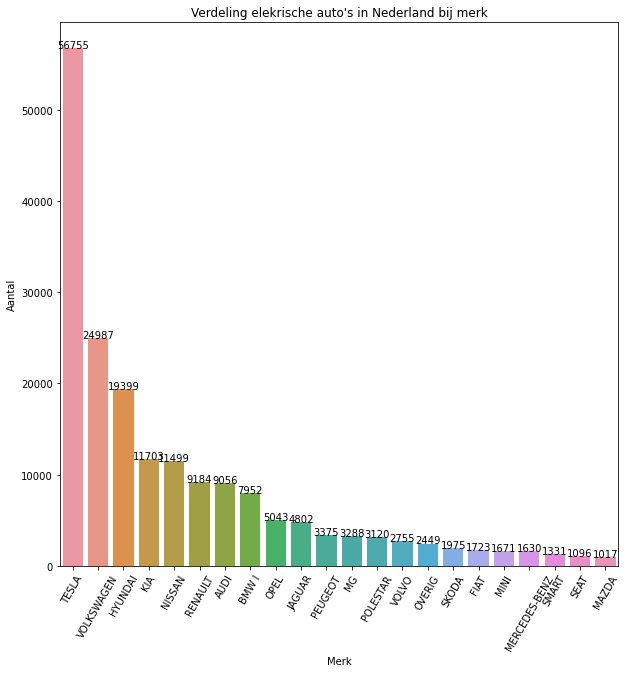

In [13]:
merk_order = data.merk.value_counts().sort_values(ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

verdeling = sns.countplot(data = data, x = 'merk', ax=ax, order = merk_order.index)
verdeling.set_xticklabels(verdeling.get_xticklabels(), rotation = 60)
plt.xlabel('Merk')
plt.ylabel('Aantal')
plt.title("Verdeling elekrische auto's in Nederland bij merk")

for z in verdeling.patches:
    height = z.get_height()
    verdeling.text(z.get_x() + z.get_width() / 2, height, height, ha = 'center')


plt.show()

* Na het kijken naar deze grafiek is te zien dat Tesla bij lange na de meest verkochte elektrische auto is in Nederland.

## 3. |  De inrichting

In bovenstaande grafiek is de verdeling te zien van de inrichting van de elektrische auto’s. De meest voorkomende zijn: stationwagen, sedan en hatchback. Wat opvallend is aan de lijst is dat er ook een elektrische ambulance en lijkwagen in zit.

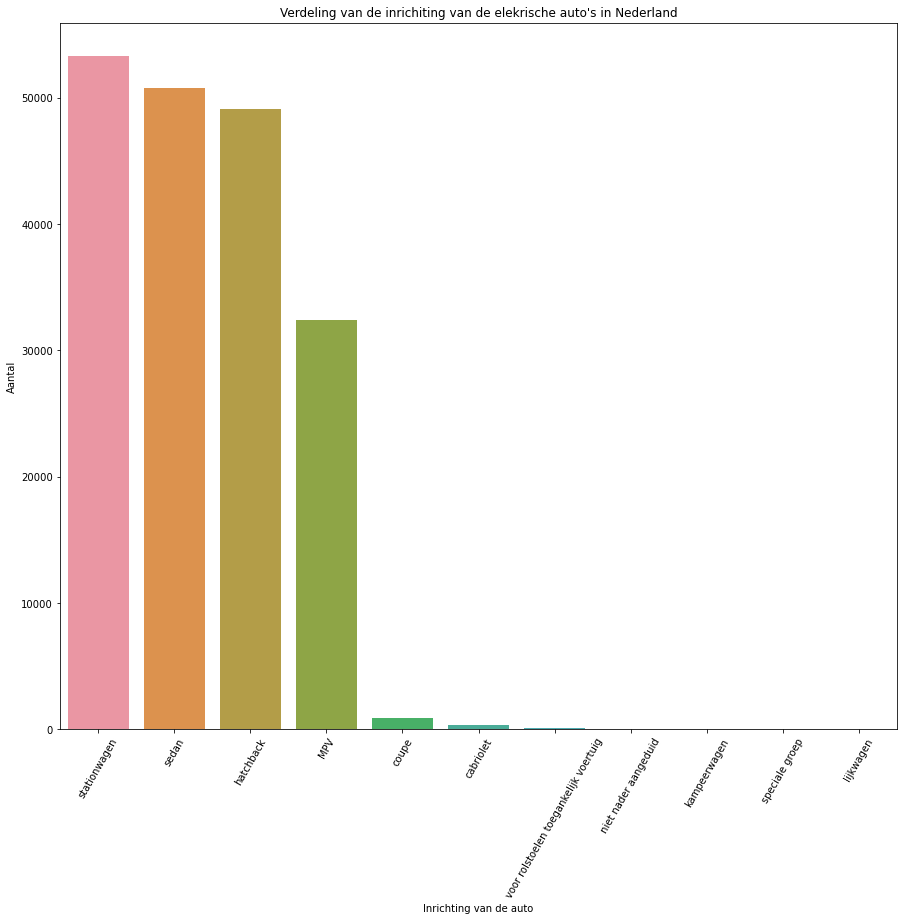

In [14]:
inrichting_order = data.inrichting.value_counts().sort_values(ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(15, 13)

inrichting = sns.countplot(data = df, x = 'inrichting', ax=ax, order = inrichting_order.index)
inrichting.set_xticklabels(inrichting.get_xticklabels(), rotation = 60)
plt.xlabel('Inrichting van de auto')
plt.ylabel('Aantal')
plt.title("Verdeling van de inrichiting van de elekrische auto's in Nederland")

#for i in inrichting.patches:
    #height = i.get_height()
    #inrichting.text(i.get_x() + i.get_width() / 2, height, height, ha = 'center')


plt.show()

* Maar hoevaak komt de verschillende inrichting voor?

In [15]:
from IPython.display import display

inrichting_dropdown = widgets.Dropdown(
    options={'Stationwagen' : (data['inrichting'].values == 'stationwagen').sum(),
             'Sedan' : (data['inrichting'].values == 'sedan').sum(), 
             'Hatchback' : (data['inrichting'].values == 'hatchback').sum(), 
             'MPV' : (data['inrichting'].values == 'MPV').sum(), 
             'Coupe' : (data['inrichting'].values == 'coupe').sum(),
             'Niet geregistreerd' : (data['inrichting'].values == 'niet geregistreerd').sum(), 
             'Cabriolet' : (data['inrichting'].values == 'cabriolet').sum(),
             'Voor rolstoelen toegankelijk voertuig' : (data['inrichting'].values == 'voor rolstoelen toegankelijk voertuig').sum(),
             'Kampeerwagen' : (data['inrichting'].values == 'kampeerwagen').sum(), 
             'Niet nader aangeduid' : (data['inrichting'].values == 'niet nadar aangeduid').sum(),
             'Lijkwagen' : (data['inrichting'].values == 'lijkwagen').sum(),
             'Speciale groep' : (data['inrichting'].values == 'speciale groep').sum(),
             'Ambulance' : (data['inrichting'].values == 'ambulance').sum()},
    description = 'Type auto:',
    disabled = False)

display(inrichting_dropdown)

Dropdown(description='Type auto:', options={'Stationwagen': 53241, 'Sedan': 50265, 'Hatchback': 48971, 'MPV': …

In [16]:
#Door midden van de bovenstaande dropdown menu is het mogelijk om te checken hoeveel auto's van een bepaalde soort er in Nederland rijden
aantal = [inrichting_dropdown.value]
for i, name in enumerate(aantal):
    print ("Er rijden op dit moment {name} elektrische auto('s) van dit type in Nederland".format(iteration=i, name=name))

Er rijden op dit moment 53241 elektrische auto('s) van dit type in Nederland


Er is in de grafiek duidelijk te zien dat de stationwagen, sedan hatchback en MPV veruit het populairst zijn.
Wat verder op valt is dat er geen elektische SUV's in Nederland rijden. 
Een Tesla als ambulance, dat zie je niet vaak.  Vanuit UMCG ambulancezorg is er een elektische spoed ambulance ontwikkeld. 
Ook bestaat er een elektische lijkwagen met het oog op een duurzame afscheidsplechtigheid.

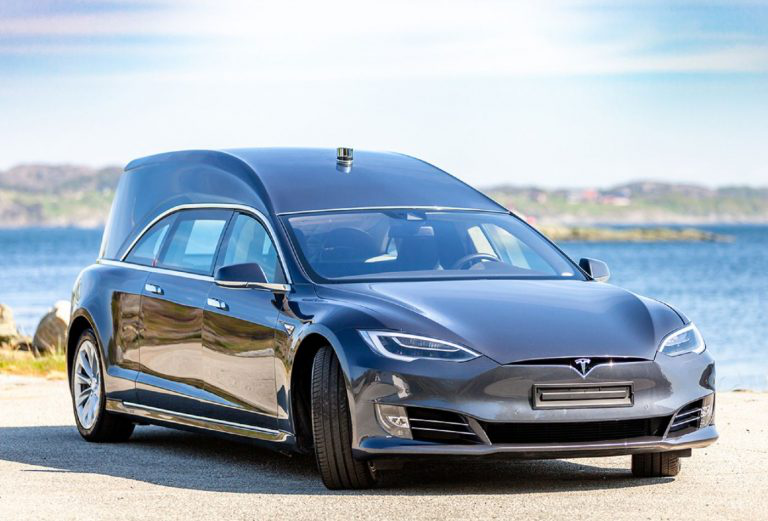

In [17]:
from urllib.request import urlopen
from PIL import Image

fotourl = 'https://uitvaartpro.be/wp-content/uploads/2019/08/106069180-1565285832489tesla-hearse-front-768x521.jpg'
img = Image.open(urlopen(fotourl))
img

## 4. | Worden elektrische auto's goedkoper?

Ook is er gekeken naar de catalogusprijzen van de elektrische auto’s tussen 2010 en 2021. In het begin zijn de relatief hoog, dit komt omdat Tesla één van de weinige aanbieders was van elektrische auto’s. De prijzen van de elektrische auto’s zijn de afgelopen jaren flink gedaald, dit komt mede doordat er meer autofabrikanten zijn die elektrische auto’s aanbieden. De catalogusprijs bij deze fabrikanten ligt lager dan de Tesla. De hoge pieken in de grafiek worden veroorzaakt door de Tesla modellen.

In [18]:
p2010 = data.loc[data['jaar'] == 2010].catalogusprijs.mean()
p2011 = data.loc[data['jaar'] == 2011].catalogusprijs.mean()
p2012 = data.loc[data['jaar'] == 2012].catalogusprijs.mean()
p2013 = data.loc[data['jaar'] == 2013].catalogusprijs.mean()
p2014 = data.loc[data['jaar'] == 2014].catalogusprijs.mean()
p2015 = data.loc[data['jaar'] == 2015].catalogusprijs.mean()
p2016 = data.loc[data['jaar'] == 2016].catalogusprijs.mean()
p2017 = data.loc[data['jaar'] == 2017].catalogusprijs.mean()
p2018 = data.loc[data['jaar'] == 2018].catalogusprijs.mean()
p2019 = data.loc[data['jaar'] == 2019].catalogusprijs.mean()
p2020 = data.loc[data['jaar'] == 2020].catalogusprijs.mean()
p2021 = data.loc[data['jaar'] == 2021].catalogusprijs.mean()

gem_prijs = data.catalogusprijs.mean()



In [19]:
interval_box = widgets.Checkbox(
                value = True,
                description = 'Gemiddelde Prijs Lijn',
                indent = False)
interval_box

Checkbox(value=True, description='Gemiddelde Prijs Lijn', indent=False)

In [20]:
interval_box2 = widgets.Checkbox(
                value = False,
                description = 'Gemiddelde Prijs voor Interval',
                indent = False)
interval_box2

Checkbox(value=False, description='Gemiddelde Prijs voor Interval', indent=False)

In [21]:
interval_silder = widgets.IntRangeSlider(
                    value = [2010, 2021],
                    min = 2010,
                    max = 2021,
                    step = 1,
                    description = 'Jaarintervallen',
                    disabled = False,
                    continuous_update = False,
                    orient = 'horizontal',
                    readout = True,
                    readout_format = 'd')
interval_silder

IntRangeSlider(value=(2010, 2021), continuous_update=False, description='Jaarintervallen', max=2021, min=2010)

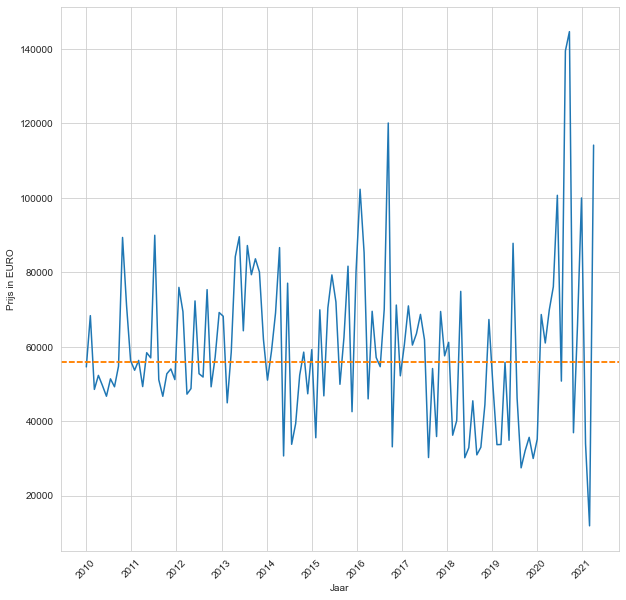

In [33]:
jaar1 = interval_silder.value[0]
jaar2 = interval_silder.value[1]

jbegin = jaar.index(jaar1)
jeind = jaar.index(jaar2) + 1

jaar = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

prijs = data.loc[((data['jaar'] >= jaar1) & (data['jaar'] <= jaar2))].catalogusprijs.mean()

jaar1 = interval_silder.value[0]
jaar2 = interval_silder.value[1]

jbegin = jaar.index(jaar1)
jeind = jaar.index(jaar2) + 1

begin = (jaar1 - 2010)
eind = (jaar2-jaar1 + 1)

begin_eind = jeind - jbegin

prijsinterval = data.loc[((data['jaar'] >= jaar1) & (data['jaar'] <= jaar2))]

sns.set_style('whitegrid')
fig,ax = plt.subplots()
fig.set_size_inches(10, 10)

pplot = sns.lineplot(data = prijsinterval, x = 'jaar_maand', y = 'catalogusprijs', ax = ax, ci = None)
pplot.set_ylabel("Prijs in EURO")
pplot.set_xlabel('Jaar')

plt.xticks(np.arange(0, ((abs(begin_eind)) * 11.2), step = 11.2), jaar[jbegin:jeind], rotation = 45)

lijn = pplot.axhline(prijs,
                    color = 'red',
                    linestyle = '--',
                    visible = interval_box.value)

lijn2 = pplot.axhline(gem_prijs,
                    color = 'orange',
                    linestyle = '--',
                    visible = interval_box.value)


if interval_box2.value == True:
    points_prijs = pd.DataFrame([p2010, p2011, p2012, p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020, p2021], index = jaar).transpose()
    sns.pointplot(data = points_prijs, join = False, color = 'red', ax = ax, zorder = 1)



plt.show()


#Note: Gemiddelde Prijs per Jaar kan niet worden gebruikt zodra de slider wordt gebruikt

## 5. | De verkoopcijfers door de jaren heen

Tesla heeft vanaf het begin de markt van de elektrische auto’s gedomineerd. De verkoopprijs bij dit merk ligt relatief hoog. In de afgelopen zijn de andere automerken ook de markt betreden. Het is opvallend dat vooral Volkswagen een groei doormaakt. De auto’s zijn een stuk goedkoper dan de Tesla maar hebben nog steeds een goede kwaliteit. Voor de consument is dit natuurlijk erg aantrekkelijk. Naar verwachting zal Volkswagen in 2021 nog een groter marktaandeel bemachtigen.

In [37]:
df= df.sort_values(by='datum_tenaamstelling')
#df

In [38]:
jaar_maand = df.datum_tenaamstelling.str.slice(0,4)
data['jaar_maand'] = jaar_maand
data.dropna(inplace = True)
#data

In [39]:
slider_aantal = widgets.IntSlider(
            value = 1,
            min = 2010,
            max = 2021,
            description = 'Verkoop Aantal',
            orientation = 'horizontal')

play = widgets.Play(
            value = 0,
            min = 2010,
            max = 2021,
            disabled = False)

datums = data.sort_values(by = 'jaar_maand')

def plot(play):
    data_jaar = datums[datums.jaar_maand == str(play)]
    plt.figure(figsize=(16,10))
    aantal_plot = sns.countplot(data = data_jaar, y = 'merk')
    plt.xlim(0, 40000)
    return aantal_plot.set(xlabel = 'Aantal Verkocht',
                           ylabel = 'Merk',
                           title = "Countplot verkochte aantal auto's per jaar"
                          )

out = widgets.interactive_output(plot, {'play' : play})

widgets.jslink((play, 'value'), (slider_aantal, 'value'))

widgets.VBox([widgets.HBox([play, slider_aantal]), out])

## 6. | Conclusie

Er is de afgelopen jaren een groei geweest in het aantal elektrische auto’s in Nederland. 
Rond 2011 was Tesla vooral de marktleider maar de afgelopen jaren zijn er diverse merken die elektrische auto’s aanbieden.  
De markt zal diverser worden met verschillende prijsklassen om elke consument te kunnen bedienen.